## Importing Tools

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import xgboost as xgb
import time
import rdkit
import mols2grid
import warnings
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem import Descriptors, AllChem, rdMolDescriptors, rdCoordGen
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
%matplotlib inline 

# ML models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# Models for Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_absolute_error, mean_squared_error

### Loading Data

In [2]:
df = pd.read_csv("QM9-extended.csv")
df

,smiles,Dipole moment,Isotropic polarizability,HOMO,LUMO,gap,Electronic Spatial Extent,Zeropoint vibrational energy,Cv at 298.15K,U at 0K,U at 298.15K,H at 298.15K,G at 298.15K
0,C,0.0000,13.21,-0.38770,0.11710,0.50480,35.3641,0.044749,6.469,-40.478930,-40.476062,-40.475117,-40.498597
1,N,1.6256,9.46,-0.25700,0.08290,0.33990,26.1563,0.034358,6.316,-56.525887,-56.523026,-56.522082,-56.544961
2,O,1.8511,6.31,-0.29280,0.06870,0.36150,19.0002,0.021375,6.002,-76.404702,-76.401867,-76.400922,-76.422349
3,C#C,0.0000,16.28,-0.28450,0.05060,0.33510,59.5248,0.026841,8.574,-77.308427,-77.305527,-77.304583,-77.327429
4,C#N,2.8937,12.99,-0.36040,0.01910,0.37960,48.7476,0.016601,6.278,-93.411888,-93.409370,-93.408425,-93.431246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153682,S=C(N1CCC1)N1CC1,5.8436,99.49,-0.19103,0.00740,0.19843,1535.3497,0.157119,30.820,-742.145697,-742.136910,-742.135966,-742.181402
153683,S=C(NC1CC1)N1CC1,4.4480,95.71,-0.20207,-0.01452,0.18755,1633.3027,0.157088,33.893,-742.152559,-742.143268,-742.142324,-742.188091
153684,C#CCNC(=S)N1CC1,5.3326,97.83,-0.20055,0.00337,0.20392,1818.9347,0.131163,33.203,-740.921816,-740.912279,-740.911335,-740.958311
153685,N#CCNC(=S)N1CC1,4.5692,92.73,-0.21470,-0.01087,0.20383,1786.2460,0.120618,29.255,-757.027308,-757.018936,-757.017991,-757.061867


In [3]:
df = df.sample(n=5000, random_state=66)
df.reset_index(drop=True, inplace=True)
df.shape

(5000, 13)

We'll only use a small portion of the `dataset` here.

In [4]:
df = df[["smiles","Cv at 298.15K"]]

In [5]:
df

,smiles,Cv at 298.15K
0,CC1=CC(=O)C(=NO)C1,31.391
1,c1c(ncnc1F)O,21.764
2,CCC(=NC)NC(=O)N,37.556
3,CC1CC2(O)C(O)C12,31.874
4,CC(=O)C1(CC1)C(=O)C,35.732
...,...,...
4995,OC1C2C3CCN2C13,25.567
4996,CCC(C)C(=O)C1CC1,38.180
4997,CC12CC1N1CC1C=C2,31.505
4998,ON=C1C(O)C(O)C1O,34.562


In [6]:
# Check for any missing values
df.isna().sum()

smiles           0
Cv at 298.15K    0
dtype: int64

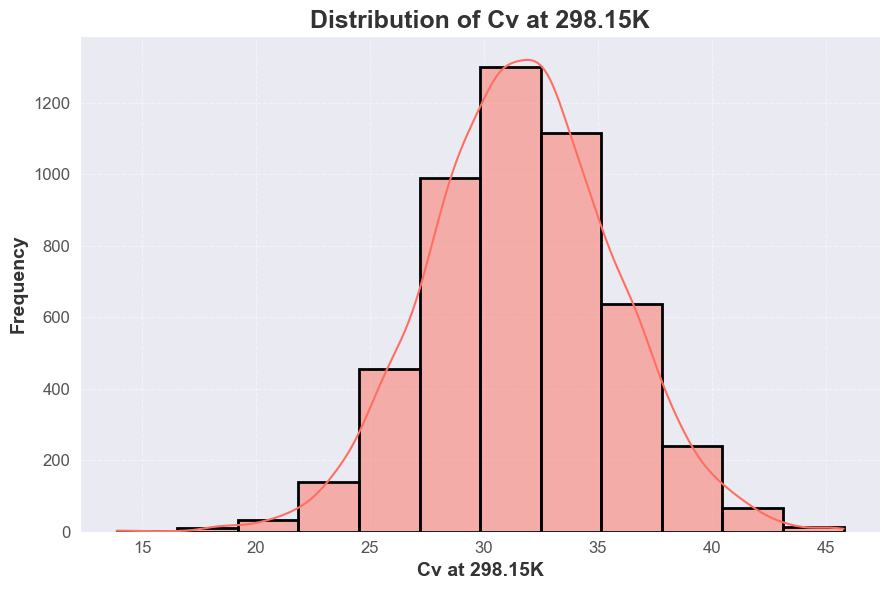

In [7]:
# Choose a style for the plot
sns.set_style('darkgrid')
sns.set_palette("crest")

# Set a font
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

# Create a figure
plt.figure(figsize=(9, 6))

# Visualize the distribution
sns.histplot(data=df, x='Cv at 298.15K', color='#FF6F61', edgecolor='black', bins=12, kde=True, linewidth=2)

# Add titles and labels
plt.title('Distribution of Cv at 298.15K', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Cv at 298.15K', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#333333')

# Improve the grid and ticks
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
# Visualising Chemicals
smiles_list = df['smiles'].to_list()
chems = [rdkit.Chem.MolFromSmiles(x) for x in smiles_list]
mols2grid.display(chems)

MolGridWidget()

## Calculating Descriptors

In [9]:
df['Molecule'] = df['smiles'].apply(Chem.MolFromSmiles)

In [10]:
def calculate_descriptors(mol):
    if mol is not None:
        return {desc[0]: desc[1](mol) for desc in Descriptors._descList}
    else:
        return {}

In [11]:
# Calculating rdkit descriptors
df_descriptors = df['Molecule'].apply(calculate_descriptors)
descriptors_df = pd.DataFrame(df_descriptors.tolist())

In [12]:
df = pd.concat([df, descriptors_df], axis=1)

In [13]:
df = df.T.drop_duplicates().T

In [14]:
df

,smiles,Cv at 298.15K,Molecule,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC1=CC(=O)C(=NO)C1,31.391,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,10.648565,0.171296,-0.171296,0.383068,23.0,125.127,118.071,...,0,0,0,0,0,0,0,0,0,0
1,c1c(ncnc1F)O,21.764,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,11.856389,0.349537,-0.724537,0.49387,9.125,114.079,111.055,...,0,0,0,0,0,0,0,0,0,0
2,CCC(=NC)NC(=O)N,37.556,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,10.157778,0.557917,-0.557917,0.382199,11.111111,129.163,118.075,...,0,0,0,0,0,0,0,0,0,1
3,CC1CC2(O)C(O)C12,31.874,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,9.176204,0.224537,-0.625579,0.455551,68.625,114.144,104.064,...,0,0,0,0,0,0,0,0,0,0
4,CC(=O)C1(CC1)C(=O)C,35.732,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,10.748611,0.037037,-0.527778,0.51594,21.111111,126.155,116.075,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,OC1C2C3CCN2C13,25.567,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,9.10537,0.071759,0.071759,0.452421,73.875,111.144,102.072,...,0,0,0,0,0,0,0,0,0,0
4996,CCC(C)C(=O)C1CC1,38.18,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,11.136343,0.31713,0.31713,0.565008,21.555556,126.199,112.087,...,0,0,0,0,0,0,0,0,0,0
4997,CC12CC1N1CC1C=C2,31.505,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,2.597222,0.604167,0.604167,0.341354,66.555556,121.183,110.095,...,0,0,0,0,0,0,0,0,0,0
4998,ON=C1C(O)C(O)C1O,34.562,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,8.645833,0.178241,-1.203704,0.225049,42.111111,133.103,126.047,...,0,0,0,0,0,0,0,0,0,0


In [15]:
warnings.simplefilter(action='ignore', category=FutureWarning)
df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

Here, I'm defining functions that convert **SMILES** into **NetworkX** graphs and then calculate some important `graph descriptors`.

In [16]:
def calculate_graph_energy(smiles):
    # Convert the SMILES string to a molecule object
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return np.nan 
    
    # Get the adjacency matrix
    adj_matrix = rdmolops.GetAdjacencyMatrix(mol)
    
    # Calculate the eigenvalues of the adjacency matrix
    eigenvalues = np.linalg.eigvals(adj_matrix)
    
    # Calculate the graph energy as the sum of the absolute values of eigenvalues
    graph_energy = np.sum(np.abs(eigenvalues))
    
    return graph_energy


def calculate_graph_entropy(smiles):
    # Convert the SMILES string to a molecule object
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return np.nan
    
    # Convert RDKit molecule to NetworkX graph
    G = nx.Graph([(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()])
    
    # Degree distribution and probability calculation
    degree_distribution = [d for _, d in G.degree()]
    if not degree_distribution:
        return np.nan

    # Calculate the probability distribution of degrees
    degree_prob = [degree_distribution.count(d) / len(degree_distribution) for d in set(degree_distribution)]
    
    # Calculate Shannon entropy
    return -sum(p * np.log2(p) for p in degree_prob if p > 0)


def calculate_harary_index(smiles):
    # Convert the SMILES string to a molecule object
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return np.nan

    # Convert RDKit molecule to NetworkX graph
    G = nx_graph = nx.Graph([(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()])
    
    # Convert the generator from all_pairs_shortest_path_length into a dictionary
    dist_dict = dict(nx.all_pairs_shortest_path_length(G))
    
    harary_index = 0
    for u in dist_dict:
        for v in dist_dict[u]:
            if u < v:  # Avoid double-counting (since distance is symmetric)
                dist = dist_dict[u][v]
                harary_index += 1 / dist
    
    return harary_index


def calculate_density(smiles):
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES

    # Convert RDKit molecule to NetworkX graph
    G = nx_graph = nx.Graph([(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()])

    # Calculate graph density
    density = nx.density(G)
    
    return density


def calculate_clustering_coefficient(smiles):
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES
    
    # Convert RDKit molecule to NetworkX graph
    G = nx_graph = nx.Graph([(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()])
    
    # Calculate the average clustering coefficient for the entire molecule
    avg_clustering_coeff = nx.average_clustering(G)
    
    return avg_clustering_coeff


def calculate_average_path_length(smiles):
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES
    
    # Convert RDKit molecule to NetworkX graph
    G = nx_graph = nx.Graph([(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()])

    # Calculate average path length
    average_path_length = nx.average_shortest_path_length(G)
    
    return average_path_length


def calculate_diameter(smiles):
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES
    
    # Convert RDKit molecule to NetworkX graph
    G = nx_graph = nx.Graph([(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()])

    # Calculate diameter
    diameter = nx.diameter(G)
    
    return diameter


def calculate_average_degree(smiles):
    # Convert SMILES to RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES
    
    # Convert RDKit molecule to NetworkX graph
    G = nx_graph = nx.Graph([(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()) for bond in mol.GetBonds()])

    # Calculate Average Degree
    average_degree = sum(dict(G.degree()).values()) / len(G.nodes())
    
    return average_degree

In [17]:
def graph_descriptors(df):
    
    df['GraphEnergy'] = df['smiles'].apply(calculate_graph_energy)

    df['GraphEntropy'] = df['smiles'].apply(calculate_graph_entropy)

    df['HararyIndex'] = df['smiles'].apply(calculate_harary_index)

    df['Density'] = df['smiles'].apply(calculate_density)

    df['ClusteringCoefficient'] = df['smiles'].apply(calculate_clustering_coefficient)

    df['AveragePathLength'] = df['smiles'].apply(calculate_average_path_length)

    df['Diameter'] = df['smiles'].apply(calculate_diameter)

    df['AverageDegree'] = df['smiles'].apply(calculate_average_degree)
    
    return df

In [18]:
# Calculating graph descriptors
df = graph_descriptors(df)

In [19]:
df

,smiles,Cv at 298.15K,Molecule,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_unbrch_alkane,fr_urea,GraphEnergy,GraphEntropy,HararyIndex,Density,ClusteringCoefficient,AveragePathLength,Diameter,AverageDegree
0,CC1=CC(=O)C(=NO)C1,31.391,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,10.648565,0.171296,-0.171296,0.383068,23.000000,125.127,118.071,...,0,0,10.778133,1.584963,19.450000,0.250000,0.000000,2.361111,5,2.000000
1,c1c(ncnc1F)O,21.764,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,11.856389,0.349537,-0.724537,0.493870,9.125000,114.079,111.055,...,0,0,9.431148,1.500000,16.083333,0.285714,0.000000,2.178571,4,2.000000
2,CCC(=NC)NC(=O)N,37.556,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,10.157778,0.557917,-0.557917,0.382199,11.111111,129.163,118.075,...,0,1,10.175084,1.530493,17.716667,0.222222,0.000000,2.722222,5,1.777778
3,CC1CC2(O)C(O)C12,31.874,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,9.176204,0.224537,-0.625579,0.455551,68.625000,114.144,104.064,...,0,0,9.468111,1.811278,17.000000,0.321429,0.104167,2.035714,4,2.250000
4,CC(=O)C1(CC1)C(=O)C,35.732,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,10.748611,0.037037,-0.527778,0.515940,21.111111,126.155,116.075,...,0,0,10.364189,1.836592,19.500000,0.250000,0.240741,2.305556,4,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,OC1C2C3CCN2C13,25.567,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,9.105370,0.071759,0.071759,0.452421,73.875000,111.144,102.072,...,0,0,10.263155,1.298795,17.833333,0.357143,0.000000,1.928571,4,2.500000
4996,CCC(C)C(=O)C1CC1,38.180,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,11.136343,0.317130,0.317130,0.565008,21.555556,126.199,112.087,...,0,0,11.292607,1.584963,18.733333,0.250000,0.259259,2.527778,5,2.000000
4997,CC12CC1N1CC1C=C2,31.505,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,2.597222,0.604167,0.604167,0.341354,66.555556,121.183,110.095,...,0,0,12.225998,1.752715,21.333333,0.305556,0.351852,2.083333,4,2.444444
4998,ON=C1C(O)C(O)C1O,34.562,<rdkit.Chem.rdchem.Mol object at 0x0000022179B...,8.645833,0.178241,-1.203704,0.225049,42.111111,133.103,126.047,...,0,0,10.726224,1.392147,19.283333,0.250000,0.000000,2.388889,5,2.000000


In [20]:
# Spliting data into X and y
X = df.drop(["smiles","Cv at 298.15K","Molecule"],axis=1)
y = df["Cv at 298.15K"]

# Split data into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [21]:
# Initialize the StandardScaler to scale the features
scaler = StandardScaler()

# Scaling the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back into DataFrames with the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [22]:
# Select the top 170 features using SelectKBest
sel = SelectKBest(f_regression, k=170).fit(X_train_scaled, y_train)

columns = X_train_scaled.columns[sel.get_support()]

# Transform the data
X_train_selected = sel.transform(X_train_scaled)
X_test_selected = sel.transform(X_test_scaled)

# Convert the transformed arrays back into DataFrames
X_train_selected = pd.DataFrame(X_train_selected, columns=columns)
X_test_selected = pd.DataFrame(X_test_selected, columns=columns)

In [23]:
X_train_selected

,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,...,fr_thiazole,fr_unbrch_alkane,GraphEnergy,GraphEntropy,HararyIndex,Density,ClusteringCoefficient,AveragePathLength,Diameter,AverageDegree
0,2.137710,1.200589,0.441005,0.683563,0.007528,-0.609064,0.007817,1.065946,-1.465384,0.790099,...,-0.113643,-0.073389,0.984029,0.084780,0.045614,0.149593,2.496810,0.938596,0.290380,0.464633
1,-0.975245,-0.083909,-0.364081,0.720059,-1.150790,-0.815836,-1.151407,-1.263991,0.157666,-0.360548,...,-0.113643,-0.073389,-0.590885,-0.033207,-1.192257,1.484049,1.117827,-0.754986,-0.856235,0.591821
2,-0.169109,-3.270835,-0.867442,-0.187224,2.401491,2.430060,2.402862,1.065946,0.145228,0.051687,...,-0.113643,-0.073389,-0.432925,0.944633,-0.011020,-0.699607,-0.655152,0.618188,0.290380,-0.552869
3,0.292796,-1.702537,0.291472,-0.264058,0.521086,0.399794,0.524514,1.065946,-0.042737,-0.253558,...,-0.113643,-0.073389,-0.398820,0.084780,0.344969,-0.699607,1.393623,-0.343033,-0.856235,-0.552869
4,0.549109,0.680636,-0.061525,1.185546,-0.104604,-0.003830,-0.103834,-0.099022,-0.268249,-0.100184,...,-0.113643,-0.073389,0.466055,-0.607246,1.008403,0.998792,-0.655152,-0.663441,0.290380,1.482136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.051868,-0.430462,-1.124407,-0.052124,-1.565972,-1.219055,-1.567863,-1.846475,-0.354178,0.723654,...,-0.113643,-0.073389,-0.979859,-0.811738,-1.701969,0.392221,1.649720,0.068919,0.290380,-0.552869
3996,-0.463802,-3.846956,-1.146426,-1.106672,0.939289,1.214026,0.936484,-0.681507,1.185877,1.264831,...,-0.113643,-0.073389,-2.699473,-0.398322,-2.074139,-0.699607,-0.655152,0.755506,0.290380,-1.697559
3997,-0.865348,0.046134,-0.447790,0.284026,0.310994,0.399794,0.313796,0.483462,1.696017,-0.862752,...,-0.113643,-0.073389,1.021587,-0.607246,0.587689,0.149593,0.920829,-0.449836,-0.856235,0.464633
3998,-0.079163,-0.812292,-0.250344,1.231646,-0.104187,-0.003425,-0.102660,-0.099022,-0.618589,-0.254076,...,-0.113643,-0.073389,0.223134,1.479940,0.709048,0.149593,-0.024760,-0.556638,-0.856235,0.464633


This may as well be pointless since there is like a **gazillion features**, but whatever.

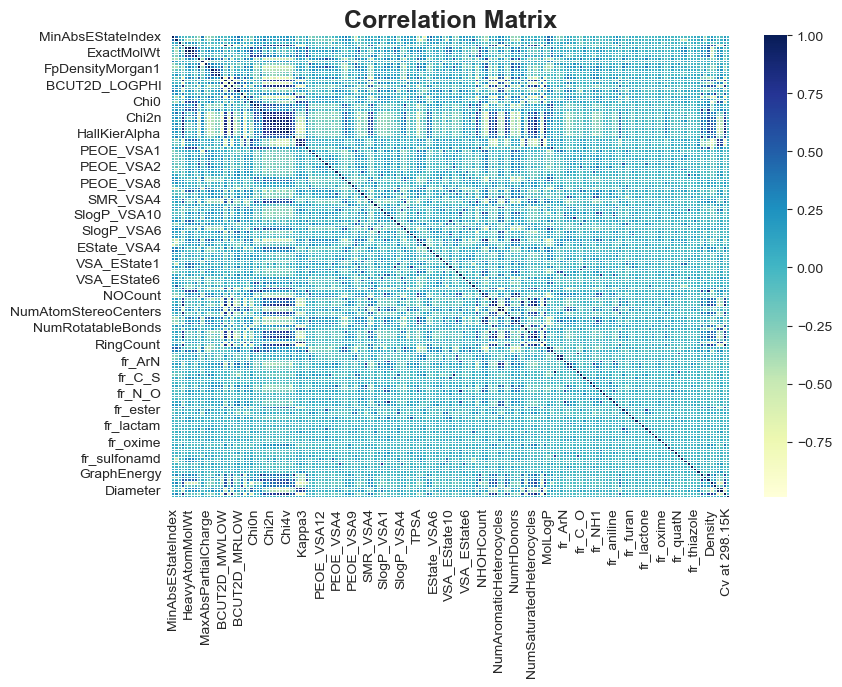

In [24]:
# Making our correlation matrix
df_col_merged = pd.concat([X_train_selected, y_train], axis=1)
corr_matrix = df_col_merged.corr()
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(corr_matrix,
                 annot=False, 
                 linewidths=0.5,
                 cmap="YlGnBu");
plt.title('Correlation Matrix',fontsize=18, fontweight="bold")
plt.show();

## Machine Learning

In [25]:
def evaluate_preds(y_true, y_preds):
    # Calculate metrics
    metrics = {"R2": r2_score(y_true, y_preds),
               "RMSE": np.sqrt(mean_squared_error(y_true, y_preds)),
               "MAE": mean_absolute_error(y_true, y_preds)}

    # Print the metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

    # Return rounded metrics
    return {metric: round(value, 3) for metric, value in metrics.items()}

In [26]:
# Put models in a dictionary
models = {"ExtraTreesRegressor": ExtraTreesRegressor(),
          "GradientBoostingRegressor": GradientBoostingRegressor(),
          "RidgeRegression": Ridge(),
          "LinearRegression": LinearRegression(),
          "XGBoost": xgb.XGBRegressor(),
          "ElasticNet": ElasticNet()}

# Iterate over each classifier using cross validation
for name, model in models.items():
            # Setup random seed
            np.random.seed(66)

            # Track model training time
            start_time = time.time()

            # Evaluate the best model
            model.fit(X_train_selected, y_train)
            y_preds = model.predict(X_test_selected)

            # Track time taken to train
            training_time = time.time() - start_time
    
            # Print evaluation metrics
            print(f"\n\033[1m{name}\033[0m")
            print(f"Training Time: {training_time:.2f} seconds")
            evaluate_preds(y_test, y_preds)


ExtraTreesRegressor
Training Time: 11.57 seconds
R2: 0.967
RMSE: 0.734
MAE: 0.520

GradientBoostingRegressor
Training Time: 7.90 seconds
R2: 0.966
RMSE: 0.740
MAE: 0.538

RidgeRegression
Training Time: 0.03 seconds
R2: 0.987
RMSE: 0.462
MAE: 0.276

LinearRegression
Training Time: 0.06 seconds
R2: 0.987
RMSE: 0.459
MAE: 0.278

XGBoost
Training Time: 0.74 seconds
R2: 0.968
RMSE: 0.725
MAE: 0.503

ElasticNet
Training Time: 0.02 seconds
R2: 0.843
RMSE: 1.597
MAE: 1.288


### Hyperparameter tuning with RandomizedSearchCV
We can try using **RandomizedSearchCV** to potentially find better hyperparameters.

In [27]:
# Create an expanded hyperparameter grid for Ridge Regression
ridge_reg_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000, 5000],  # Expanded range for better regularization tuning
    'fit_intercept': [True, False],  # Including 'None' for automatic fitting
    'max_iter': [1000, 5000, 10000, 15000],  # Expanded iteration range
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']  # Added solvers for more flexibility
}

# Setup RandomizedSearchCV for Ridge Regression
rs_ridge_reg = RandomizedSearchCV(Ridge(),
                                  param_distributions=ridge_reg_grid,
                                  cv=5,
                                  verbose=True,
                                  n_iter=70,  # Number of iterations to sample
                                  n_jobs=1,
                                  random_state=66)

# Fit RandomizedSearchCV for Ridge Regression
rs_ridge_reg.fit(X_train_selected, y_train)

# Make predictions
y_preds = rs_ridge_reg.predict(X_test_selected)

# Evaluate predictions
evaluate_preds(y_test, y_preds);

Fitting 5 folds for each of 70 candidates, totalling 350 fits
R2: 0.987
RMSE: 0.460
MAE: 0.277


## Evaluation
Evaluating the model using `10-fold cross-validation`.

In [28]:
def cv_evaluate_preds(model, X, y, cv=10):
    # Define scoring metrics
    scoring_metrics = {
        'R2': 'r2',
        'RMSE': 'neg_root_mean_squared_error',
        'MAE': 'neg_mean_absolute_error'
    }
    
    # Initialize dictionary to store results
    results = {}

    # Calculate scores for each metric
    for metric, scoring in scoring_metrics.items():
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        if 'neg' in scoring:  # Handle negative scoring metrics (MAE, RMSE)
            scores = np.abs(scores)
        results[metric] = round(scores.mean(), 3)

    # Print results
    for metric, score in results.items():
        print(f"{metric}: {score:.3f}")
    
    return results

In [29]:
# Setup random seed
np.random.seed(66)

ridge_reg = Ridge()
ridge_reg = ridge_reg.set_params(**rs_ridge_reg.best_params_).fit(X_train_selected, y_train)
y_preds = ridge_reg.predict(X_test_selected)
cv_evaluate_preds(ridge_reg, X_train_selected, y_train);

R2: 0.988
RMSE: 0.442
MAE: 0.288


In [30]:
def plot_features(X, model, n=25):

    # Choose a style for the plot
    sns.set_style('darkgrid')
    sns.set_palette("crest")
    
    # Get absolute value of coefficients (feature importances)
    importances = np.abs(model.coef_)
    
    # Sort the importances and get the top 'n' features
    sorted_idx = np.argsort(importances)[::-1][:n]
    
    # Plot the top 'n' features
    plt.figure(figsize=(11, 8))
    plt.barh(X.columns[sorted_idx], importances[sorted_idx], color="royalblue", edgecolor='black')
    plt.title('Feature Importance', fontsize=14, fontweight="bold")
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.show()

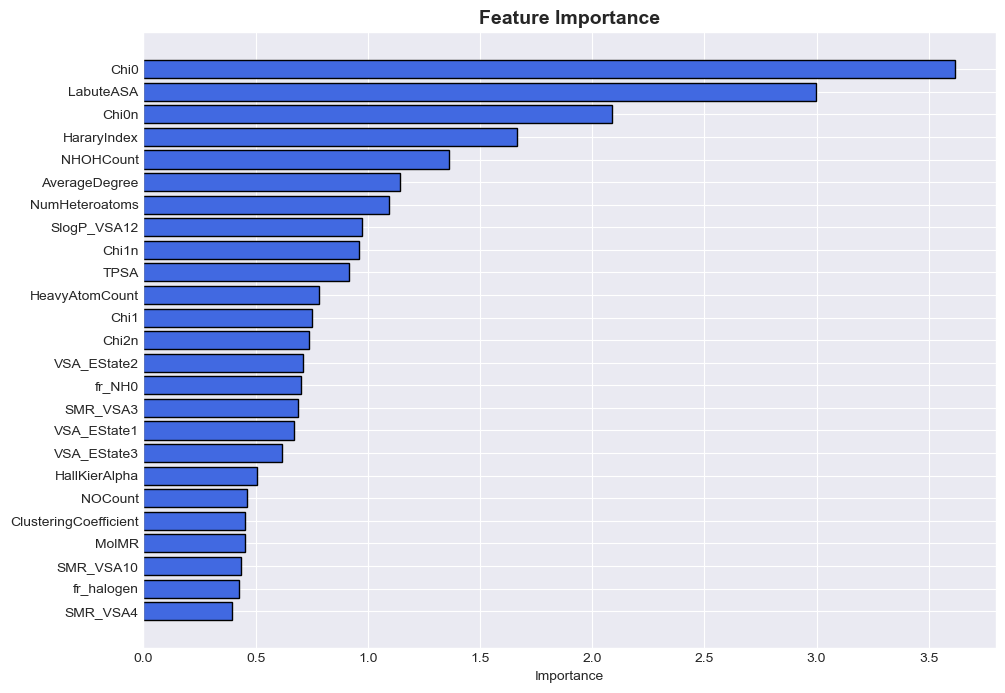

In [31]:
plt.style.use("seaborn-v0_8-whitegrid")
plot_features(X_train_selected, ridge_reg)

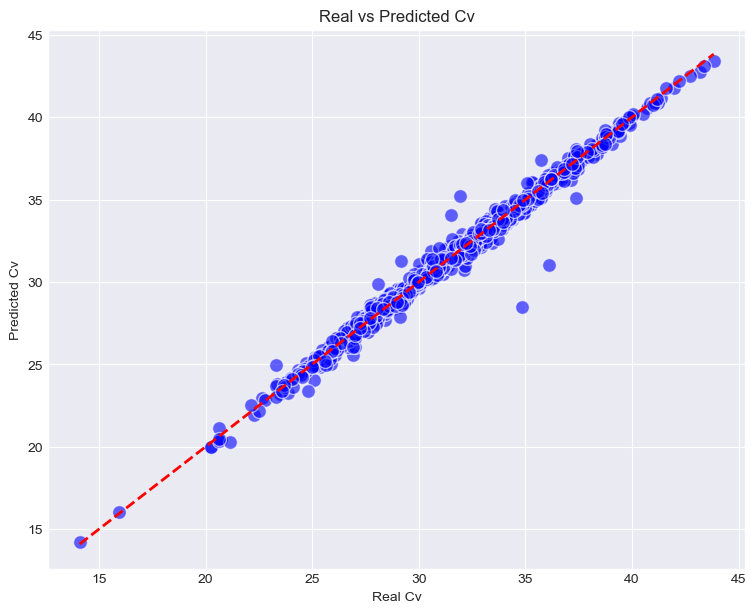

In [32]:
# Choose a style for the plot
sns.set_style('darkgrid')
sns.set_palette("crest")
plt.figure(figsize=(9,7))
plt.scatter(y_test, y_preds, color='blue', alpha=0.6, edgecolors='w', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Line of perfect prediction
plt.title('Real vs Predicted Cv')
plt.xlabel('Real Cv')
plt.ylabel('Predicted Cv')
plt.grid(True)
plt.show()